<a href="https://colab.research.google.com/github/AKAALBRAMHA/Car-Price-Evaluation-Using-Machine-Learning/blob/main/Car_Price_Evaluation_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-63-9d679728569c>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


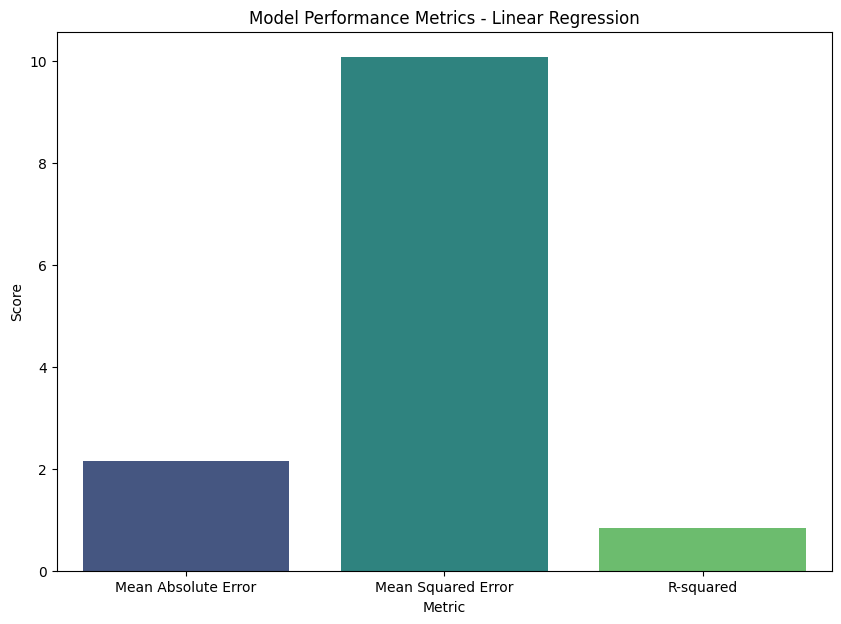

<ipython-input-63-9d679728569c>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


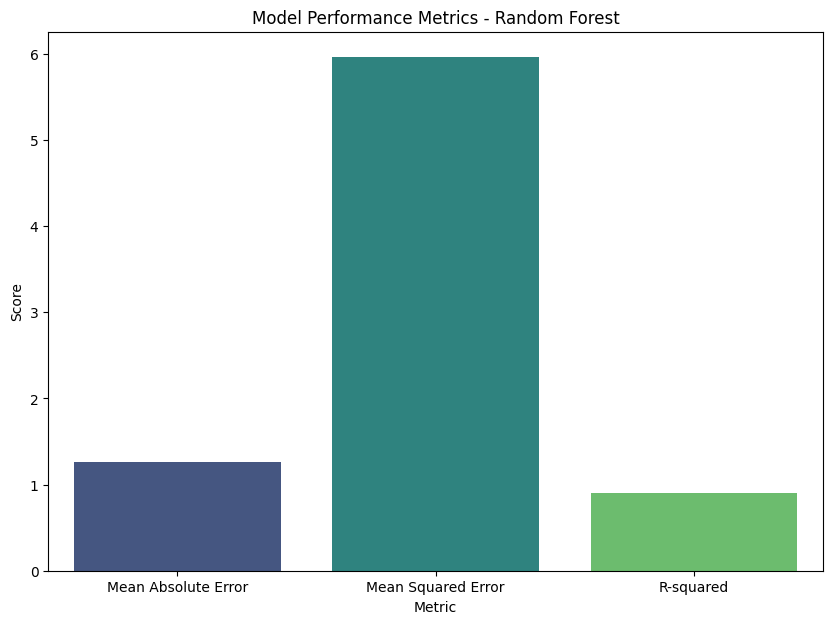

<ipython-input-63-9d679728569c>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


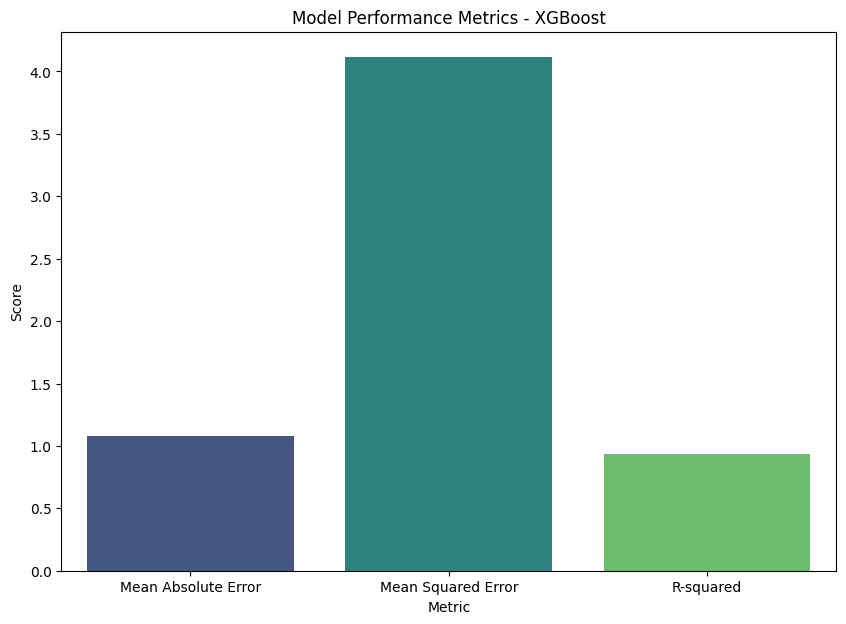

In [63]:
# Importing Required Libraries

# Data Manipulation And Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model evaluation metrics
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

# Load and Prepare Data
df = pd.read_csv('/content/cardata.csv')

# Prepare features and target variable
X = df.drop('Present_Price', axis=1)
y = df['Present_Price']

# Encode categorical variables if necessary
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Models
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Model Performance Summary
def plot_model_performance(metrics, model_name):
    metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])
    plt.figure(figsize=(10, 7))
    sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
    plt.title(f'Model Performance Metrics - {model_name}')
    plt.show()

# Evaluate Linear Regression
metrics_linear = {
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred_linear),
    'Mean Squared Error': mean_squared_error(y_test, y_pred_linear),
    'R-squared': r2_score(y_test, y_pred_linear)
}
plot_model_performance(metrics_linear, 'Linear Regression')

# Evaluate Random Forest Regressor
metrics_rf = {
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred_rf),
    'Mean Squared Error': mean_squared_error(y_test, y_pred_rf),
    'R-squared': r2_score(y_test, y_pred_rf)
}
plot_model_performance(metrics_rf, 'Random Forest')

# Evaluate XGBoost Regressor
metrics_xgb = {
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred_xgb),
    'Mean Squared Error': mean_squared_error(y_test, y_pred_xgb),
    'R-squared': r2_score(y_test, y_pred_xgb)
}
plot_model_performance(metrics_xgb, 'XGBoost')
